<a href="https://colab.research.google.com/github/pgurazada/prompt-engineering/blob/main/prompt-engineering-with-azure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

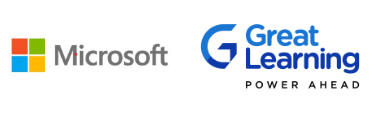
</center>

# Business Case Study -  Khanmigo!

Khanmigo is an AI-powered tool from Khan Academy that they call "Tutor for learners. Assistant for teachers.” It provides personalized learning experiences for students. It offers guidance to students on math, science, and humanities problems, a debate tool, and a writing tutor. It can support teachers in several tasks, like a teaching assistant.

Today, we are going to replicate some of the features of Khanmigo using prompting techniques we have learnt so far. We are going to focus on select features of Khanmigo that are developed to help teachers.

We will step into the shoes of developers who have built these features for Khanmigo.

## Journey of a Teacher

To Develop features that a teacher would require, we need to empathise with the teacher. So, Let's jump into the shoes of a teacher. Let's say Our first assignment is to teach about Newton's third law of motion to grade 8 students. Below is the lesson material provided by our institution.

**Lesson Material:**

Title: Understanding Newton's Third Law: Action and Reaction

**Objective:**
By the end of this lesson, students will be able to:

1. Define Newton's Third Law of Motion.
2. Identify action and reaction force pairs in various scenarios.
3. Explain real-life applications of Newton's Third Law.

**Body:**

**1. What is Newton's Third Law?**
   - Explain that Newton's Third Law states: "For every action, there is an equal and opposite reaction."
   - Break down the meaning of this law: when one object exerts a force on a second object, the second object exerts a force of equal magnitude in the opposite direction on the first object.

**2. Action and Reaction Pairs:**
   - Provide examples and ask students to identify the action and reaction force pairs in each scenario. Examples could include:
     - A person pushing against a wall.
     - A ball bouncing off the ground.
     - A swimmer pushing against the water.
   - Encourage students to think about the forces involved and how they act on different objects.

**3. Real-Life Applications:**
   - Discuss real-life examples where Newton's Third Law is at play, such as:
     - Rocket propulsion: The action force is the expulsion of gas from the rocket engines, and the reaction force is the resulting upward movement of the rocket.
     - Walking: Each step involves pushing against the ground, which pushes back with an equal force, propelling the person forward.
     - Driving a car: The tires push against the road, and the road pushes back, propelling the car forward.
   - Encourage students to brainstorm other examples they encounter in daily life.
   
**Conclusion:**
Review the key points of the lesson:
- Newton's Third Law states that for every action, there is an equal and opposite reaction.
- Action and reaction force pairs exist in all interactions between objects.
- Understanding Newton's Third Law helps us explain and predict motion in the world around us.

**Assessment:**
Conduct a short quiz or discussion to assess students' understanding of Newton's Third Law and their ability to identify action and reaction force pairs in different scenarios. Encourage students to ask questions if they need further clarification.

**Extension:**
Challenge students to research and present on advanced applications of Newton's Third Law, such as in sports, engineering, or space exploration. This can deepen their understanding and appreciation of the concept.



---


This is good foundational material but this alone doesn't provide great learning experience. One of the first things a good learning experience requires is a lesson hook.

A lesson hook is a tool used by teacher to grab students' attention and maintaining their engagement, providing a gateway into the lesson's content.

A lesson hook can take various forms, such as a question, activity, game, story, or compelling analogy. Each topic can be approached and explained from diverse angles. An effective lesson hook not only seizes attention but also makes the subject matter relevant to students' lives, sparking curiosity and fostering a desire to delve deeper into the topic.

However, brainstorming lesson hooks for each topic can be overwhelming, particularly when dealing with multiple classes or classes with varying cognitive levels. Leveraging Language Models (LLMs), teachers can swiftly generate ideas tailored to the topic and cognitive level. Additionally, incorporating students' interests and hobbies can further enhance the relevance and relatability of the lesson hooks.


---



So, the first feature of our app should be a 'lesson hook creator'. Before we dive into building that, let's set up our environment.

## Setup

### Installation

Since Colab instances are not persistent, for each session, we need to install the packages required for the session each time a new session is started.


In [1]:
!pip install openai==1.2 tiktoken==0.6 session-info --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.9/219.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00


### Imports

In [2]:
# Import all Python packages required to access the Azure Open AI API
import json
import tiktoken
import session_info

from openai import AzureOpenAI

### Authentication

In order to be abe to authenticate our identity and programmatically access the Azure Open AI API from Google Colab, we need to read our credentials into the Colab environment in a secure way.

A strongly recommended method to do this is to write credentials to a `json` file that is read during execution of a Colab session. Do not save keys in a public repository.

In [17]:
# Azure Open AI redentials and the id of the deployed chat model are stored as
# key value pairs in a json file

with open('config_v1_2.json', 'r') as az_creds:
    data = az_creds.read()

In [18]:
creds = json.loads(data)

In [19]:
# Credentials to authenticate to the personalized Open AI model server

client = AzureOpenAI(
    azure_endpoint=creds["AZURE_OPENAI_ENDPOINT"],
    api_key=creds["AZURE_OPENAI_KEY"],
    api_version=creds["AZURE_OPENAI_APIVERSION"]
)

In [20]:
# Deployment namre of the ChatCompletion endpoint
CHATGPT_MODEL = creds["CHATGPT_MODEL"]

## 1 Creating a Lesson Hook

**What Does a Lesson Hook Accomplish?**

**Grabbing Attention:** A hook immediately captures students' attention and focuses their minds on the lesson at hand.

**Generating Curiosity:** It piques students' curiosity and encourages them to want to learn more about the topic.

**Creating Relevance:** By relating the lesson to students' lives or interests, a hook makes the material more relevant and meaningful to them.

**Building Enthusiasm:** A well-executed hook creates excitement and enthusiasm for learning, motivating students to actively participate in the lesson.

**Establishing Connection:** It establishes a connection between the students and the lesson content, laying the foundation for deeper understanding and engagement.

In summary, a lesson hook is a powerful tool for engaging students, generating interest, and setting the stage for effective learning. It captures attention, fosters curiosity, and makes the lesson content relevant and meaningful to students, ultimately leading to greater retention and understanding.

We will get the LLM to output multiple potent lesson hooks out of which teachers will pick a lesson hook that works best for them based on their audience and resources available to them.

---


We need to create a prompt that can get a lesson hook from the LLM given a topic. Of the three prompting techniques we learnt, what do you think is the best prompting technique for this purpose?

Let's try one by one and see what works best. You are encouraged to suggest modifications to the prompts.

---



### 1.1 Zero-Shot

In [21]:
zero_shot_prompt = """Create a list of 3-5 engaging lesson hooks for a  lesson keeping in mind the grade of the students.
The hooks should be designed to capture students' attention and interest at the start of the lesson.
Consider the developmental needs and interests of students at this age when crafting the hooks."""

In [22]:
user_prompt = "Create a lesson hook for a lesson on newton's third law of motion for grade 8 students"

In [23]:
messages = [
    {"role": "system", "content": zero_shot_prompt},
    {"role": "user", "content": user_prompt}
]

In [24]:
response = client.chat.completions.create(
    model=CHATGPT_MODEL,
    messages=messages,
    max_tokens=4096
)

In [ ]:
print(response.choices[0].message.content)

1. "Do you ever wonder why the ground doesn't break when you jump? Or why a rocket doesn't take off if it doesn't have something to push against? Today, we're going to find out with Newton's Third Law of Motion!"

2. "Imagine playing a game of tug-of-war with your friend. When you pull on the rope, what happens to your friend?" [students respond] "That's right! They pull back with an equal and opposite force. This is the concept we'll be exploring in Newton's Third Law of Motion."

3. "Have you ever played billiards or pool? You might have noticed that when you hit one ball, the other ball moves in the opposite direction. This is a great example of Newton's Third Law in action! Today, we'll learn how this law applies to all kinds of objects and movements."

4. "How would you like to conduct an experiment where you get to throw eggs without them breaking? Well, today we're going to get to experiment with protecting our eggs by using Newton's Third Law. Get ready for a fun activity!"

5.

That's not a bad output at all. We can further modify parameters like temperature and top-k.

What do you think temperature should be for this excercise. Low or High? Why do you think so?

### 1.2 Temperature

This parameter controls the variability in the response. Using a higher temperature results in potentially lower probability tokens being chosen.

With higher temperatures, we could prompt the model to make multiple completions for the same prompt.

With a temperature of 0, only the highest probability tokens are chosen so multiple completions should return the same response. This is not very useful for our feature. We want to give multiple options to the teachers to choose from.

In [26]:
response = client.chat.completions.create(
    model=CHATGPT_MODEL,
    messages=messages,
    n=2,# <- This will ask the model to present two choices for completion so that the teacher has many options to choose from
    temperature=0
)

In [27]:
print(response.choices[0].message.content)

1. "The Great Balloon Race": Inflate two balloons and attach them to a string. Have students hold the string and let go of the balloons at the same time. Ask them to observe what happens. This activity demonstrates Newton's Third Law of Motion, where for every action, there is an equal and opposite reaction.

2. "Egg Drop Challenge": Challenge students to design a container that will protect an egg from breaking when dropped from a height. This activity will require students to apply Newton's Third Law of Motion to create a design that will counteract the force of gravity and prevent the egg from breaking.

3. "Human Tug-of-War": Divide the class into two teams and have them play tug-of-war. Ask students to observe what happens when one team pulls harder than the other. This activity demonstrates Newton's Third Law of Motion, where the force exerted by one team is equal and opposite to the force exerted by the other team.

4. "Rocket Launch": Build a simple rocket using a balloon, a st

In [28]:
print(response.choices[1].message.content)

1. "The Great Balloon Race": Inflate two balloons and attach them to a string. Have students hold the string and let go of the balloons at the same time. Ask them to observe what happens. This activity demonstrates Newton's Third Law of Motion, where for every action, there is an equal and opposite reaction.

2. "Egg Drop Challenge": Challenge students to design a container that will protect an egg from breaking when dropped from a height. This activity will require students to apply Newton's Third Law of Motion to create a design that will counteract the force of gravity and prevent the egg from breaking.

3. "Human Tug-of-War": Divide the class into two teams and have them play tug-of-war. Ask students to observe what happens when one team pulls harder than the other. This activity demonstrates Newton's Third Law of Motion, where the force exerted by one team is equal and opposite to the force exerted by the other team.

4. "Rocket Launch": Build a simple rocket using a balloon, a st

In [30]:
response = client.chat.completions.create(
    model=CHATGPT_MODEL,
    messages=messages,
    max_tokens=4096,
    n=2, # <- This will ask the model to present two choices for completion
    temperature=0.8
)

In [31]:
print(response.choices[0].message.content)

1. "Have you ever played a game of tug-of-war? You pull one side and the other team pulls the opposite side. Have you ever noticed how when one team pulls harder, the other team is pulled in the opposite direction? This is Newton's third law of motion in action!"

2. "Imagine you are standing on a skateboard and push off against a wall. What do you think will happen? Will the skateboard move away from the wall? Or will the wall move away from the skateboard? Let's find out how Newton's third law of motion explains what happens!"

3. "Have you ever seen a rocket launch? The rocket shoots up into the sky and leaves a trail of smoke behind. But, did you know that the rocket is propelled into the air because of Newton's third law of motion? Let's explore how the rocket's propulsion system works and how Newton's third law plays a role."

4. "Let's play a game of air hockey and see how Newton's third law of motion affects the game. Every time you hit the puck, it will bounce off the opposite

In [32]:
print(response.choices[1].message.content)

1. "Egg Drop Challenge": Challenge the students to design and create a container that will protect a raw egg from breaking, when dropped from a certain height. Have them drop the egg containers and observe how the egg and container react. Then, introduce Newton's Third Law of Motion, explaining how the force of the egg hitting the ground (action) is equal and opposite to the force of the container hitting the egg (reaction).

2. "Human Tug-of-War": Divide the class into two groups, and have them play tug-of-war. Ask the students to observe what happens when one team pulls harder than the other. Introduce Newton's Third Law of Motion, explaining that the force that one team applies to the rope is equal and opposite to the force that the other team applies to the rope.

3. "Balloon Rockets": Have the students make balloon rockets using straws, string, and balloons. As they launch their rockets, ask them to observe what happens to the balloons and the straws. Introduce Newton's Third Law 

Those are decent results. Moving on, let's look at the quality of results we can get with few-shot prompting.

### 1.3 Few Shot Prompting

In [33]:
system_message = """Create a list of 3-5 engaging lesson hooks for a  lesson keeping in mind the grade of the students.
The hooks should be designed to capture students' attention and interest at the start of the lesson.
Consider the developmental needs and interests of students at this age when crafting the hooks."""

In [34]:
messsages = [
    {"role": "system", "content": system_message},

    {"role": "user", "content": "Create a lesson hook on States of Matter for grade 5"},
    {"role": "assistant", "content": """Bring in a few different objects (e.g., ice cube, piece of metal, balloon) and ask students to describe their properties.
Then reveal that these objects are all made of the same basic building blocks - atoms and molecules - just in different states."""},

    {"role": "user", "content": "Create a lesson hook on Multiplication for grade 3"},
    {"role": "assistant", "content": """Tell a simple story about going to the store and buying multiple items of the same kind (e.g., 3 bags of apples with 4 apples in each bag).
Have students act it out with manipulatives to discover multiplication."""},

    {"role": "user", "content": "Create a lesson hook on civil war for grade 7"},
    {"role": "assistant", "content": """Hook: Read contrasting first-hand accounts from soldiers on opposite sides of a major battle.
Discuss how perspectives differ."""},

    {"role": "user", "content": "Create a lesson hook on Photosynthesis for grade 7"},
    {"role": "assistant", "content": """The Incredible Shrinking Student: Tell students to imagine they are shrinking down to the size of a molecule to take a journey inside a leaf.
Use this to introduce the structures involved in photosynthesis."""},

    {"role": "user", "content": "Create a lesson hook on Photosynthesis for grade 7"},
    {"role": "assistant", "content": """Divide the class into teams, each representing a part of the photosynthesis process.
Have them race to complete the process in the correct order."""},

    {"role": "user", "content": "Create a lesson hook on Anantomy for grade 6"},
    {"role": "assistant", "content": """"Interview a Body Part": Assign each student a specific body part or system.
Have them create interview questions and then act out an interview with their assigned part, discussing its functions, challenges, and fun facts.
"""},

    {"role": "user", "content": "Create a lesson hook on Ancient Civilizations for grade 7"},
    {"role": "assistant", "content": """""The Lost Civilization": Students are archaeologists who have discovered a long-lost civilization.
As they uncover artifacts and decipher ancient texts, they learn about the culture, achievements, and eventual decline of this mysterious society, inspiring a deep dive into ancient history.
Question Hook: "Why do some societies thrive while others collapse? Is it simply a matter of luck, or are there underlying patterns?" This hook is ideal for a unit on the rise and fall of ancient civilizations.
"""},
    {"role": "user", "content": user_prompt}
    ]


In [35]:
response = client.chat.completions.create(
    model=CHATGPT_MODEL,
    messages=messages,
    n=2,# <- This will ask the model to present two choices for completion
    temperature=0.8
)

In [36]:
print(response.choices[0].message.content)

1. "Who's Stronger, You or Superman?" - Start the lesson off by asking students if they think they could beat Superman in an arm wrestling match. After a few laughs, explain that even though Superman has incredible strength, according to Newton's Third Law, for every action, there is an equal and opposite reaction. Ask students to think about how this applies to a game of tug-of-war or arm wrestling.

2. "Egg Drop Challenge" - Present the students with a challenge to build a structure that will protect an egg from breaking when dropped from a certain height. To introduce the concept of Newton's Third Law, ask students to think about what happens to the egg when it hits the ground and how the force of the ground affects the egg. After the activity, discuss how the egg's force on the ground is equal to the ground's force on the egg.

3. "Balloon Rockets" - Show students a video clip of a rocket launching into space. Ask them to think about how the rocket is able to move through the air a

In [37]:
print(response.choices[1].message.content)

1. The Egg Drop Challenge: Start the lesson by challenging students to design and build a device that will protect an egg from breaking when dropped from a certain height. Then, explain how Newton's Third Law of Motion relates to the challenge. This hook is great because it is hands-on and allows students to understand the concept of action and reaction.

2. Balloon Rockets: Demonstrate how a balloon rocket works, where the air escaping from the balloon creates a force that propels the rocket forward. Discuss how this relates to Newton's Third Law of Motion and how each action has an equal and opposite reaction. This hook is great because it is visual and interactive, allowing students to see the concept in action.

3. Human Tug-of-War: Divide the class into two groups and have them play a game of tug-of-war. Discuss how the force pulling in opposite directions creates an equal and opposite reaction. Relate this to Newton's Third Law of Motion and discuss how it applies to everyday sit

The performance of few-shot prompting is tied to the examples provided in the prompt and also on the nature of the task. In this task, few-shot is not significantly better than zero-shot. Better examples could lead to better results.

Using examples, you can drive guide the LLM's response in new directions. You can use as many examples as you wish, however, with each new example you are increasing the token consumption per API call which will lead to higher costs. The number of examples should be optimised by iteratively adding and removing examples and checking its effect on performance.

Checking performance on a generation task can be challenging. In the next week, we will do the same exercise of optimising examples in a few-shot prompt for a classification task where it is easier to gauge the performance.

At the start, we said a lesson hook should have the following qualities.

1. Grabbing Attention

2. Generating Curiosity

3. Creating Relevance

4. Building Enthusiasm

5. Establishing Connection

We can use enforce these qualities in the llm's response by crafting a chain of thought prompt.

### 1.4 CoT

In [38]:
cot_prompt = """
 Create an engaging lesson hooks for a topic for a given grade level classroom.
 The hooks should be designed to capture students' attention and interest at the start of the lesson.
 Consider the developmental needs and interests of students at this age when crafting the hooks.

Below are 5 steps you need to follow to craft the lesson hook. At each step, you should check if any rewriting of the hook is necessary.
If so, add or remove text to aligh with the step. At the end, you should give me a lesson hook that follows all the guidelines.
At each step, evaluate if the current core of the hook is effective.
If at any point you feel like the current hook is ineffective, you should restart crafting the hook with a new core idea.

Step 1: Identify the lesson topic and key concepts
- What is the main subject or theme of the lesson?
- What are the most important ideas or skills students should learn?

Step 2: Consider the students' interests, experiences, and prior knowledge
- What do the students already know about this topic?
- What aspects of the topic might the students find most interesting or relatable to their lives?
- What current events, popular culture references, or real-world examples could help connect the lesson to the students' experiences?

Step 3: Brainstorm attention-grabbing opening techniques
- Could you start with a surprising fact, statistic, or statement related to the topic?
- Is there a thought-provoking question you could pose to the students?
- Could you present a mysterious or intriguing scenario that ties into the lesson?
- Would a short, engaging story or anecdote help capture the students' attention?

Step 4: Incorporate elements of curiosity and relevance
- How can you frame the hook to make students curious to learn more about the topic?
- What aspects of the hook will make the lesson feel relevant and meaningful to the students' lives or interests?
- Could you hint at an exciting activity, demonstration, or revelation to come later in the lesson?


At the end, evaluate all the ideas you have created and finally choose a single lesson hook that's best suited.
Explain why it's the best lesson hook and then write the best lesson hook.
"""

In [39]:
user_prompt = "Create a lesson hook for a lesson on newton's third law of motion for grade 8 students"

In [40]:
messages = [
    {"role": "system", "content": cot_prompt},
    {"role": "user", "content": user_prompt}
]

In [42]:
response = client.chat.completions.create(
    model=CHATGPT_MODEL,
    messages=messages,
    n=2,# <- This will ask the model to present two choices for completion
    temperature=0.6
)

In [43]:
print(response.choices[0].message.content)

Step 1: Identify the lesson topic and key concepts
- Lesson topic: Newton's Third Law of Motion
- Key concepts: Action and reaction forces, equal and opposite forces

Step 2: Consider the students' interests, experiences, and prior knowledge
- Students may have prior knowledge of Newton's First and Second Laws of Motion
- Many students may enjoy sports and physical activities that involve motion and forces
- Students may be interested in superhero movies and how they use force to fight

Step 3: Brainstorm attention-grabbing opening techniques
- Start with a video clip of a superhero movie fight scene and ask students to identify the forces involved
- Pose the question, "Can you really punch someone without getting punched back?"
- Show a short video clip of a car crash and ask students to identify the forces involved
- Start with a demonstration of a balloon rocket and ask students to explain the forces involved

Step 4: Incorporate elements of curiosity and relevance
- Frame the hook 

In [44]:
print(response.choices[1].message.content)

Step 1: 
Lesson topic and key concepts: 
The lesson topic is Newton's third law of motion, which states that for every action, there is an equal and opposite reaction. The key concepts include the definition of force, the relationship between action and reaction, and real-world examples of the third law in action.

Step 2: 
Consider the students' interests, experiences, and prior knowledge: 
Grade 8 students might already have some knowledge of motion and force from their previous science classes. They might be interested in sports and games that involve movement, which can be related to the topic. Additionally, students might be intrigued by explosions, collisions, and other dramatic physical events.

Step 3: 
Brainstorm attention-grabbing opening techniques: 
- Start by showing a video of a rocket launch and ask the students what forces are involved in making the rocket move.
- Ask the students to imagine they are standing on a skateboard and pushing against a wall. What happens when

We got lesson hooks that are more comprehensive but not necessarily better solution for teachers. While CoT provides a collection of creative hooks for teachers to choose from, Few-shot offers a single, more comprehensive lesson hook. The choice between them ultimately depends on the teacher's preference. It's important to consider the teacher's input to determine the appropriate prompting technique. You can experiment with different parameters to find the optimal combination. As mentioned before, prompting is an iterative process.

## 2 Crafting Examples

The lesson hook engages the students and makes the class exciting and interactive. However, we also need to provide ample amount of examples to make the learning relevant to the real world.

Teachers often do not have the time to brainstorm real world examples. LLMs are of great help here. A list of examples can also be provided as additional material for the students.



---


What do you think is a sufficient prompting technique to craft examples for a topic?


---


While it's often observed that Chain of though (COT) and Few-Shot prompting tend to yield superior results compared to Zero-Shot Learning, it's important to note their token-intensive nature, which invariably leads to higher costs. For companies like Khanmigo, operating on a subscription-based revenue model, mitigating such expenses is crucial. In instances where Zero-Shot Learning demonstrates comparable performance, it should be the preferred option.

In the context of crafting examples, Zero-Shot prompting stands out as an apt choice.

However, give that this has a creative element to it, what do you think should be the temperature, top-k, top-p should be for this exercise? High or Low ?

### 2.1 Zero Shot

In [45]:
example_prompt = """Write 10 examples for the following lesson material. Add a brief explanation of the example.
The lesson material is:

{material}

"""

In [46]:
user_input = """
**Lesson Material:**

Title: Understanding Newton's Third Law: Action and Reaction

**Objective:**
By the end of this lesson, students will be able to:

1. Define Newton's Third Law of Motion.
2. Identify action and reaction force pairs in various scenarios.
3. Explain real-life applications of Newton's Third Law.

**Body:**

**1. What is Newton's Third Law?**
   - Explain that Newton's Third Law states: "For every action, there is an equal and opposite reaction."
   - Break down the meaning of this law: when one object exerts a force on a second object, the second object exerts a force of equal magnitude in the opposite direction on the first object.

**2. Action and Reaction Pairs:**
   - Provide examples and ask students to identify the action and reaction force pairs in each scenario. Examples could include:
     - A person pushing against a wall.
     - A ball bouncing off the ground.
     - A swimmer pushing against the water.
   - Encourage students to think about the forces involved and how they act on different objects.

**3. Real-Life Applications:**
   - Discuss real-life examples where Newton's Third Law is at play, such as:
     - Rocket propulsion: The action force is the expulsion of gas from the rocket engines, and the reaction force is the resulting upward movement of the rocket.
     - Walking: Each step involves pushing against the ground, which pushes back with an equal force, propelling the person forward.
     - Driving a car: The tires push against the road, and the road pushes back, propelling the car forward.
   - Encourage students to brainstorm other examples they encounter in daily life.

"""

In [47]:
response = client.chat.completions.create(
    messages = [{"role": "user", "content": example_prompt.format(material = user_input)}],
    model = CHATGPT_MODEL,
    max_tokens=1000,
    temperature=0.8
)

In [48]:
print(response.choices[0].message.content)

1. A person leaning against a wall: When a person leans against a wall, the force they exert on the wall is the action force, and the reaction force is the force the wall exerts back on the person.
2. A balloon being inflated: When air is pumped into a balloon, the action force is the air being forced into the balloon, and the reaction force is the balloon expanding.
3. A hammer hitting a nail: When a hammer strikes a nail, the action force is the hammer striking the nail, and the reaction force is the nail pushing back on the hammer.
4. Jumping off a diving board: When a person jumps off a diving board, the action force is the person pushing down on the board, and the reaction force is the board pushing the person up into the air.
5. A boat propelling forward: When a boat moves forward through water, the action force is the propeller pushing water backward, and the reaction force is the water pushing the boat forward.
6. A basketball being dribbled: When a basketball is dribbled on th

These are nice examples but they are very common ones. The teacher can come up with such examples themselves. Let's try to get examples that are uncommon. One way to do that is by making the LLM chose uncommon words at each step. Let's set the top-p high so that the model choses new low probabilty words as well.

### 2.2 Top p

In [50]:
response = client.chat.completions.create(
    messages = [{"role": "user", "content": example_prompt.format(material = user_input)}],
    model = CHATGPT_MODEL,
    max_tokens=1000,
    temperature=0.95,
    top_p = 0.6
)

In [51]:
print(response.choices[0].message.content)

1. A person throwing a ball: When the person throws the ball, they exert a force on it. The ball then exerts an equal and opposite force on the person's hand.
2. A bird flying: The bird exerts a force on the air with its wings, and the air exerts an equal and opposite force on the bird, allowing it to fly.
3. A car crashing into a wall: The car exerts a force on the wall, and the wall exerts an equal and opposite force on the car, causing it to stop.
4. A diver jumping off a diving board: The diver exerts a force on the diving board, and the diving board exerts an equal and opposite force on the diver, propelling them into the air.
5. A balloon being inflated: As air is blown into the balloon, the balloon exerts an equal and opposite force on the air, causing it to fill up.
6. A person walking on the ground: With each step, the person exerts a force on the ground, and the ground exerts an equal and opposite force on the person, allowing them to move forward.
7. A hammer hitting a nail:

Good! However, we might want to use newer contexts to make it novel. So increasing one of frequency penalty and presence penaltys should do the trick. (Changing the prompt will also works here. But let's see how frequency penalty individually affects the response.)

presence_penalty: Optional - Number between -2.0 and 2.0. - Defaults to 0
Positive values penalize new tokens based on whether they appear in the text so far, increasing the model's likelihood to talk about new topics.

frequency_penalty - Optional - Number between -2.0 and 2.0. - Defaults to 0
Positive values penalize new tokens based on their existing frequency in the text so far, decreasing the model's likelihood to repeat the same line verbatim.

Let's set the frequency penalty high so that we get new words.

### 2.3 Penalties

In [52]:
response = client.chat.completions.create(
    messages = [{"role": "user", "content": example_prompt.format(material = user_input)}],
    model = CHATGPT_MODEL,
    max_tokens=1000,
    temperature=0.95,
    frequency_penalty = 1.5
)

In [53]:
print(response.choices[0].message.content)

1. A person jumping off a diving board: The action force is the person pushing down on the diving board, and the reaction force is the upward movement of the person.
2. Playing tug-of-war: Each team is exerting an equal but opposite force on each other, creating a static situation until one team overcomes their opponent.
3. A balloon being inflated: The action force is air being blown into the balloon, and the reaction force causes it to expand.
4. Rowing a boat: Each time an oar hits against water (which provides resistance), it pushes back with an equal opposing force which propels both rowers forward - this demonstrates how Newton's third law can come into play in even simple tasks like rowing!
5. Hitting a baseball with a bat: The action forces involve hitting (striking) of bat against ball whilst holding still or sliding backwards after impact; whereas reactionary forces manifest as changes in direction caused by acceleration from collision between objects.
6. Push-up exercises he

Slight Improvement. Let's also change the prompt.

In [54]:
example_prompt = """Write 10 uncommon examples for the following lesson material.
Add a brief explanation of the example.
The lesson material is:

{material}

"""

In [55]:
response = client.chat.completions.create(
    messages = [{"role": "user", "content": example_prompt.format(material = user_input)}],
    model = CHATGPT_MODEL,
    max_tokens=1000,
    temperature=0.95,
    frequency_penalty = 1.5
)

In [56]:
print(response.choices[0].message.content)

1. A diver jumping off a diving board and the force of the water pushing back up on them.
2. A person using a jackhammer to break pavement and the equal force that pushes against their arms in the opposite direction.
3. An airplane's engines pushing air backwards, causing it to move forward through the air (thrust).
4. Playing catch with a ball; when you throw it towards your partner, they push against it with an equal force in order for them to catch it.
5. When blowing up balloons, as one blows into them they are met with an equal resistance from inside of it which makes blowing more difficult as more air is added
6. Loading weights onto barbells at a gym creates two forces acting upon each other seemingly equally but opposing one another; weight and motion vs gravity's downward pull
7.An escalator where users walk this way on stairs while standing idle people go that way leading friction created by differing speeds or momentum balancing out influences 
8.A swimmer encountering water

Together the prompt and the penalty bring us some new examples that are not main stream. This should allow the teacher to bring new examples to the classroom that are more relatable to the children.

## 3 Automating Quizzes




---


Once the lesson is taught, the subsequent task for a teacher involves crafting a test to assess students' retention. Generating quizzes can be a tedious endeavor. Let's leverage Language Models to automate the quiz creation process.


---



### 3.1 Zero_shot

In [57]:
quiz_input = """Task: Generate a mcq quiz on the teaching material mentioned above


Output Format:
Use the following format for each question:

Question: [QUESTION TEXT]
Options:
a) [OPTION A]
b) [OPTION B]
c) [OPTION C]
d) [OPTION D]

Correct option: [Correct Option]

Incorrect Answers:
a) [EXPLANATION FOR OPTION A BEING INCORRECT]
b) [EXPLANATION FOR OPTION B BEING INCORRECT]
c) [EXPLANATION FOR OPTION C BEING INCORRECT]
d) [EXPLANATION FOR OPTION D BEING INCORRECT]

"""

In [58]:
user_input = """
**Lesson Material:**

Title: Understanding Newton's Third Law: Action and Reaction

Objective: By the end of this lesson, students will be able to:

Define Newton's Third Law of Motion.
Identify action and reaction force pairs in various scenarios.
Explain real-life applications of Newton's Third Law.
Body:

1. What is Newton's Third Law?

Explain that Newton's Third Law states: "For every action, there is an equal and opposite reaction."
Break down the meaning of this law: when one object exerts a force on a second object, the second object exerts a force of equal magnitude in the opposite direction on the first object.
2. Action and Reaction Pairs:

Provide examples and ask students to identify the action and reaction force pairs in each scenario. Examples could include:
A person pushing against a wall.
A ball bouncing off the ground.
A swimmer pushing against the water.
Encourage students to think about the forces involved and how they act on different objects.
3. Real-Life Applications:

Discuss real-life examples where Newton's Third Law is at play, such as:
Rocket propulsion: The action force is the expulsion of gas from the rocket engines, and the reaction force is the resulting upward movement of the rocket.
Walking: Each step involves pushing against the ground, which pushes back with an equal force, propelling the person forward.
Driving a car: The tires push against the road, and the road pushes back, propelling the car forward.
Encourage students to brainstorm other examples they encounter in daily life."""

In [59]:
messages = [{"role":"user","content":user_input+quiz_input}]

In [60]:
response = client.chat.completions.create(
    messages = messages,
    model = CHATGPT_MODEL,
    max_tokens=1000,
    temperature=0.2
)

In [61]:
print(response.choices[0].message.content)

Question: What does Newton's Third Law state?

Options:
a) For every action, there is an equal and opposite reaction.
b) For every reaction, there is an equal and opposite action.
c) For every force, there is an equal and opposite force.
d) For every object, there is an equal and opposite object.

Correct option: a) For every action, there is an equal and opposite reaction.

Incorrect Answers:
b) This is the opposite of Newton's Third Law.
c) This is a general statement about forces, not specific to Newton's Third Law.
d) This is not a correct statement.

Question: What is an action and reaction force pair?

Options:
a) Two forces that act on the same object.
b) Two forces that act in the same direction.
c) Two forces that act on different objects, with equal magnitude and opposite direction.
d) Two forces that act on different objects, with equal magnitude and same direction.

Correct option: c) Two forces that act on different objects, with equal magnitude and opposite direction.

In

### 3.2 COT

Let's try COT with this exercise. We would expect COT to perform better.

In [62]:
quiz_input = """Task: Generate a quiz on the teaching material mentioned above with the following specifications:

First:
- Understand the key concepts related to teaching material
- Identify the components/elements of teaching material
- Apply the principles of teaching material to solve problems

Question Format:
- Generate 10 multiple-choice questions with 4 options each
- Ensure questions are clear, concise, and test only one concept/skill
- Avoid ambiguity or tricky language in the questions and options

Options:
- Include relevant and plausible distractors (incorrect options)
- Vary the length of options to prevent unintentional hints
- Randomize the order of options for each question

Explanations:
- Provide a detailed explanation for the correct answer, including additional context, examples, or reinforcement of understanding
- For each incorrect option, explain why it is incorrect and address any potential misconceptions or errors in thinking

Output Format:
Use the following format for each question:

Question: [QUESTION TEXT]
Options:
a) [OPTION A]
b) [OPTION B]
c) [OPTION C]
d) [OPTION D]

Explanation:
[EXPLANATION FOR CORRECT ANSWER]

Incorrect Answers:
a) [EXPLANATION FOR OPTION A BEING CORRECT/INCORRECT]
b) [EXPLANATION FOR OPTION B BEING CORRECT/INCORRECT]
c) [EXPLANATION FOR OPTION C BEING CORRECT/INCORRECT]
d) [EXPLANATION FOR OPTION D BEING CORRECT/INCORRECT]

Think step by step"""

In [63]:
user_input = """
**Lesson Material:**

Title: Understanding Newton's Third Law: Action and Reaction

Objective: By the end of this lesson, students will be able to:

Define Newton's Third Law of Motion.
Identify action and reaction force pairs in various scenarios.
Explain real-life applications of Newton's Third Law.
Body:

1. What is Newton's Third Law?

Explain that Newton's Third Law states: "For every action, there is an equal and opposite reaction."
Break down the meaning of this law: when one object exerts a force on a second object, the second object exerts a force of equal magnitude in the opposite direction on the first object.
2. Action and Reaction Pairs:

Provide examples and ask students to identify the action and reaction force pairs in each scenario. Examples could include:
A person pushing against a wall.
A ball bouncing off the ground.
A swimmer pushing against the water.
Encourage students to think about the forces involved and how they act on different objects.
3. Real-Life Applications:

Discuss real-life examples where Newton's Third Law is at play, such as:
Rocket propulsion: The action force is the expulsion of gas from the rocket engines, and the reaction force is the resulting upward movement of the rocket.
Walking: Each step involves pushing against the ground, which pushes back with an equal force, propelling the person forward.
Driving a car: The tires push against the road, and the road pushes back, propelling the car forward.
Encourage students to brainstorm other examples they encounter in daily life."""

In [64]:
messages = [{"role":"user","content":user_input+quiz_input}]

In [65]:
response = client.chat.completions.create(
    messages = messages,
    model = CHATGPT_MODEL,
    max_tokens=1000,
    temperature=0.2
)

In [66]:
print(response.choices[0].message.content)

Step 1: Identify key concepts related to teaching material
- Newton's Third Law of Motion
- Action and reaction force pairs
- Real-life applications of Newton's Third Law

Step 2: Identify components/elements of teaching material
- Definition of Newton's Third Law
- Examples of action and reaction force pairs
- Real-life applications of Newton's Third Law

Step 3: Apply principles of teaching material to solve problems
- Identify action and reaction force pairs in various scenarios
- Explain real-life applications of Newton's Third Law

Step 4: Generate quiz questions
1. What does Newton's Third Law state?
a) Every object in motion will stay in motion unless acted upon by an external force.
b) The force of an object is equal to its mass times acceleration.
c) For every action, there is an equal and opposite reaction.
d) The acceleration of an object is directly proportional to the force applied to it.

Explanation: 
c) Newton's Third Law states that for every action, there is an equal 

The output from both the techniques is not that different. COT prompting isn't as useful as we expected in this situation. Zero-shot-prompt performed suffieciently well and since it is token-efficient, we should use that. However, in a different context COT's performance can be substantially higher.

For example, let's carry out the same exercise for a math class. Let's say the topic is solving two-step equations.

## 4 Math Quiz

**Things to Ponder:**
What kind of temperature, top-p, frequency penalty values can we use here?

Note: Though we want the answers to be same everytime, we want different questions so that the teacher can chose from a variety of options.


What happens if we change temperature and what happens if we change top-p?

Temperature regulates randomness, with lower temperatures yielding less randomness (greater determinism), whereas higher temperatures result in increased randomness.

In more technical terms, a lower temperature boosts the model's confidence in its primary selections. A temperature set at 0 equates to argmax or maximum likelihood, representing the token with the highest probability. A higher temperature modifies the probabilities in such a way that all probabilities are closer to each other i.e., the model has only slightly more confidence in it's top choices. We do not want the model to be in this state for calculation. Hence a temperature of zero is fit for this situation.

Regarding top-p, it calculates the cumulative probability distribution and halts once this distribution surpasses the specified top-p value. For instance, a top-p value of 0.3 implies that only tokens encompassing the top 30% probability mass are considered.


Between the two options, it is far more logical to maintain a temperature of zero. This ensures that high-probability terms, such as answers, are prioritized for selection. In instances where high probability terms are not present, words can be chosen from a limited sample set by incrementally increasing the top-p to small values.

### 4.1 Zero_shot

In [67]:
quiz_input = """Task: Generate a mcq quiz on the teaching material mentioned above.


Output Format:
Use the following format for each question:

Question: [QUESTION TEXT]
Options:
a) [OPTION A]
b) [OPTION B]
c) [OPTION C]
d) [OPTION D]

Correct Option: [Correct Option]

Explanation:
[EXPLANATION FOR CORRECT ANSWER]

Incorrect Answers:
a) [EXPLANATION FOR OPTION A BEING CORRECT/INCORRECT]
b) [EXPLANATION FOR OPTION B BEING CORRECT/INCORRECT]
c) [EXPLANATION FOR OPTION C BEING CORRECT/INCORRECT]
d) [EXPLANATION FOR OPTION D BEING CORRECT/INCORRECT]

"""

In [68]:
user_input = """
**Lesson Material:**

solving two-step equations"""

In [69]:
messages = [{"role":"user","content":user_input+quiz_input}]

In [70]:
response = client.chat.completions.create(
    messages = messages,
    model = CHATGPT_MODEL,
    temperature=0,
    top_p = 0.2
)

In [71]:
print(response.choices[0].message.content)

Question: What is the first step in solving a two-step equation?
Options:
a) Add or subtract the same number from both sides
b) Multiply or divide both sides by the same number
c) Combine like terms on both sides
d) None of the above

Correct Option: b) Multiply or divide both sides by the same number

Explanation:
The first step in solving a two-step equation is to undo the addition or subtraction by multiplying or dividing both sides by the same number.

Incorrect Answers:
a) Adding or subtracting the same number from both sides is the second step in solving a two-step equation.
c) Combining like terms on both sides is not always necessary in solving a two-step equation.
d) None of the above is incorrect as there is a specific first step in solving a two-step equation.

Question: Solve for x: 3x + 5 = 14
Options:
a) x = 3
b) x = 4
c) x = 9
d) x = 11

Correct Option: b) x = 4

Explanation:
To solve for x, we first undo the addition by subtracting 5 from both sides, then undo the multi

We can clearly see that most of the answers provided are incorrect. But you can see that it generates the right answer during explanation. Let's try COT and see if we can get better responses.

An LLM can be made to "think" in steps by making small changes to the prompt. The general way of achieving that is by adding the line "think in steps" to the prompt.
Let me show you a small change in our curren prompt which has the same effect. It forces the llm to think first and answer later.

Placing the explanation before the correct option in the prompt is intended to prompt the LLM Model to engage in a more thoughtful process when formulating its response. Rather than immediately providing an answer, this approach encourages the model to approach the problem by breaking it down into simpler sub-problems. By doing so, it is more probable that the model will find answers to these sub-problems within its training data, thereby increasing the likelihood of accurate responses. Subsequently, the model can build upon the solutions obtained from these sub-problems to address the entire problem effectively.

In [72]:
quiz_input = """Task: Generate a mcq quiz on the teaching material mentioned above.


Output Format:
Use the following format for each question:

Question: [QUESTION TEXT]
Options:
a) [OPTION A]
b) [OPTION B]
c) [OPTION C]
d) [OPTION D]

Explanation:
[EXPLANATION FOR CORRECT ANSWER]

Correct Option: [Correct Option]

Incorrect Answers:
a) [EXPLANATION FOR OPTION A BEING CORRECT/INCORRECT]
b) [EXPLANATION FOR OPTION B BEING CORRECT/INCORRECT]
c) [EXPLANATION FOR OPTION C BEING CORRECT/INCORRECT]
d) [EXPLANATION FOR OPTION D BEING CORRECT/INCORRECT]

"""

In [73]:
user_input = """
**Lesson Material:**

solving two-step equations"""

In [74]:
messages = [{"role":"user","content":user_input+quiz_input}]

In [75]:
response = client.chat.completions.create(
    messages = messages,
    model = CHATGPT_MODEL,
    temperature=0,
    top_p = 0.2
)

In [76]:
print(response.choices[0].message.content)

Question: What is the first step in solving a two-step equation?
Options:
a) Add or subtract the constant term
b) Multiply or divide the variable term
c) Combine like terms
d) None of the above

Explanation: The first step in solving a two-step equation is to undo the addition or subtraction by performing the opposite operation.

Correct Option: a

Incorrect Answers:
b) Multiplying or dividing the variable term is the second step in solving a two-step equation.
c) Combining like terms is not necessary in solving a two-step equation.
d) None of the above is incorrect as there is a specific first step in solving a two-step equation.

Question: Solve for x: 3x + 5 = 14
Options:
a) x = 3
b) x = 4
c) x = 9
d) x = 11

Explanation: The first step is to undo the addition by subtracting 5 from both sides. This gives 3x = 9. The second step is to undo the multiplication by dividing both sides by 3. This gives x = 3.

Correct Option: a

Incorrect Answers:
b) This is not the correct solution.
c) T



---


The answers are much more accurate.


---



### 4.2 COT

Let's try a more standard CoT approach and let's ask the model to 'think through the problem and explain its answer' without doing the trick with explanation and let's see how good that approach is.

In [77]:
quiz_input = """Think through and explain your answer
Task: Generate a mcq quiz with 10 questions on the teaching material mentioned above.

Output Format:
Use the following format for each question:

Question: [QUESTION TEXT]
Options:
a) [OPTION A]
b) [OPTION B]
c) [OPTION C]
d) [OPTION D]

Correct Option: [Correct Option]

Explanation:
[EXPLANATION FOR CORRECT ANSWER]

Incorrect Answers:
a) [EXPLANATION FOR OPTION A BEING CORRECT/INCORRECT]
b) [EXPLANATION FOR OPTION B BEING CORRECT/INCORRECT]
c) [EXPLANATION FOR OPTION C BEING CORRECT/INCORRECT]
d) [EXPLANATION FOR OPTION D BEING CORRECT/INCORRECT]

"""

In [78]:
user_input = """
**Lesson Material:**

solving two-step equations"""

In [79]:
messages = [{"role":"user","content":user_input+quiz_input}]

In [80]:
response = client.chat.completions.create(
    messages = messages,
    model = CHATGPT_MODEL,
    temperature=0.2
)

In [81]:
print(response.choices[0].message.content)

Question: What is the first step in solving a two-step equation?
Options:
a) Add or subtract the constant term
b) Multiply or divide the variable term
c) Combine like terms
d) None of the above

Correct Option: b) Multiply or divide the variable term

Explanation:
The first step in solving a two-step equation is to undo the operation that is being performed on the variable term. If the variable term is being multiplied or divided, then the opposite operation (division or multiplication) should be performed to isolate the variable.

Incorrect Answers:
a) Adding or subtracting the constant term is the second step in solving a two-step equation.
c) Combining like terms is not necessary in solving a two-step equation.
d) None of the above is incorrect as there is a specific first step in solving a two-step equation.

Question: Solve for x: 3x + 5 = 14
Options:
a) x = 3
b) x = 4
c) x = 9
d) x = 11

Correct Option: b) x = 4

Explanation:
To solve this equation, we need to undo the addition o

It is as bad as a zero-prompt before switching the explanation and correct option placement. We can see that the simple trick of placing explanation above correct answer works much better than a standard CoT trick. This illustrates that prompt engineering is an emperical field and experimentation is the only way to find the best prompt.


Upon repeated attempts at this exercise, you'll find that regardless of the quality of the prompt, language models (LLMs) will inevitably produce incorrect responses. This is because LLMs operate probabilistically and aren't designed for precise calculations. While some LLMs tailored for math might perform better, there's no guarantee of always getting the right answer.

The only reliable method for accurate responses from LLMs is to utilize agents that go beyond what we cover in this course. These agents represent the most suitable LLM technology for such tasks.

**Power Ahead!**